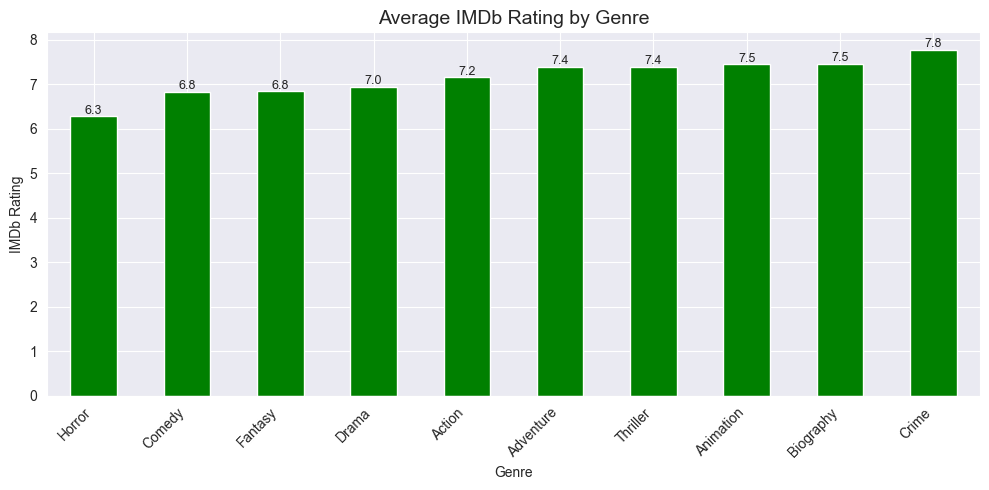

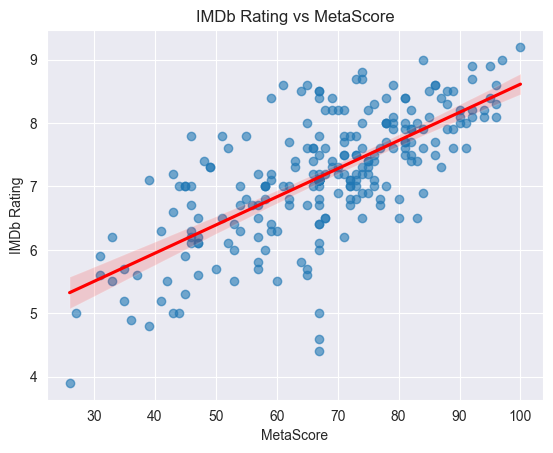

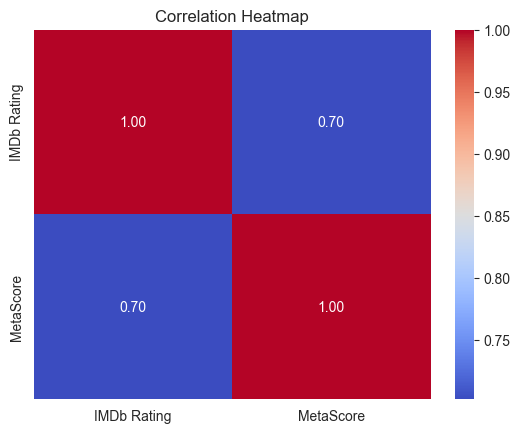

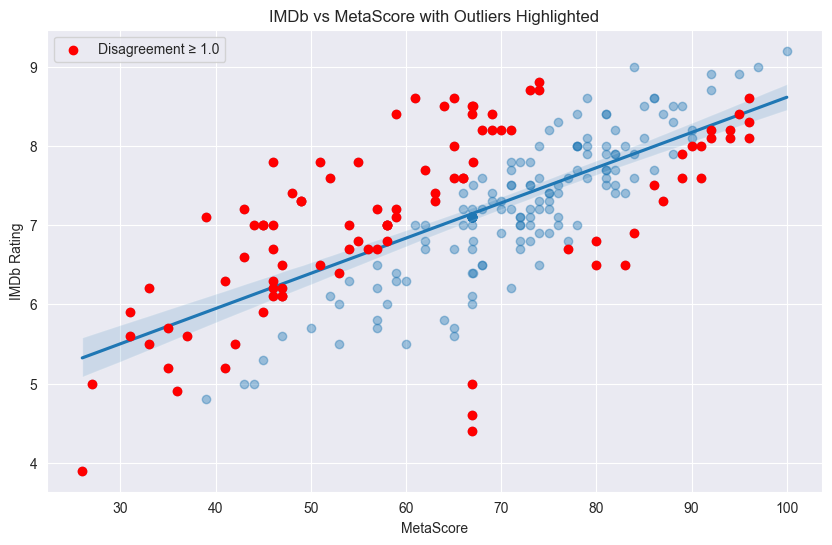

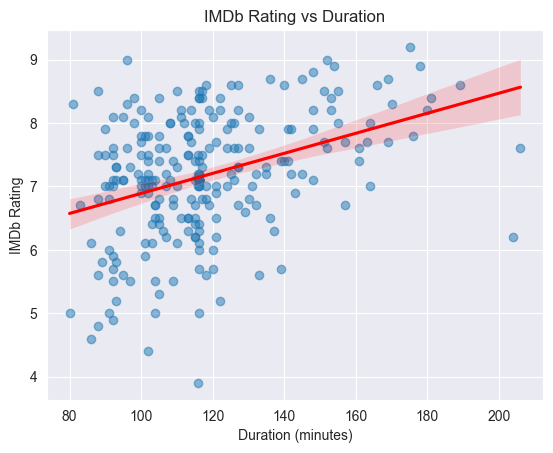

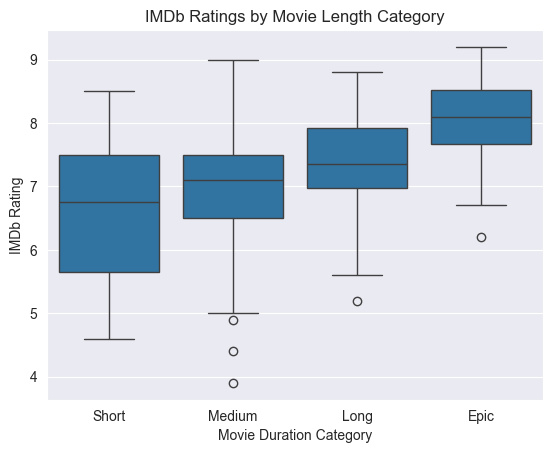

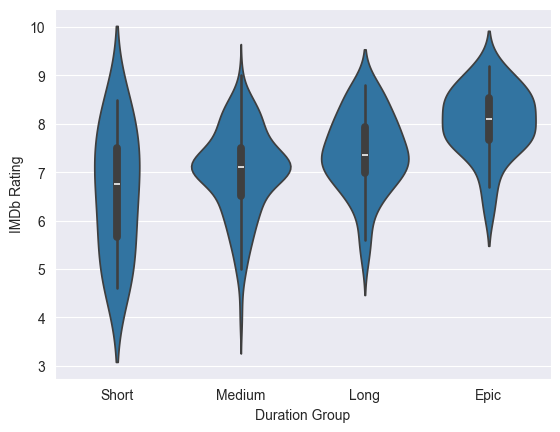

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("data/IMDb_Dataset.csv")

# Data cleaning
# 1. Remove duplicates
df = df.drop_duplicates()


# Data visualization
# 1. Bar chart - Average IMDb Rating per Genre
ratings = df.groupby("Genre")["IMDb Rating"].mean().sort_values()
fig, ax = plt.subplots(figsize=(10, 5))
bars = ratings.plot(kind="bar", color="green", ax=ax, label="")
ax.set_title("Average IMDb Rating by Genre", fontsize=14)
ax.set_xlabel("Genre")
ax.set_ylabel("IMDb Rating")

for i, v in enumerate(ratings):
    ax.text(i, v + 0.05, f"{v:.1f}", ha='center', fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Scatter plot - Correlation of IMDb score with MetaScore
correlation = df["IMDb Rating"].corr(df["MetaScore"])
sns.regplot(x="MetaScore", y="IMDb Rating", data=df, scatter_kws={"alpha":0.6}, line_kws={"color": "red"})
plt.title("IMDb Rating vs MetaScore")
plt.xlabel("MetaScore")
plt.ylabel("IMDb Rating")
plt.show()

# 3. Heatmap - Correlation of IMDb score with MetaScore
corr_matrix = df[["IMDb Rating", "MetaScore"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 4. Scatter plot - Correlation of IMDb score with MetaScore with Outliers
df["RatingDiff"] = df["IMDb Rating"] - (df["MetaScore"] / 10)
outliers = df[abs(df["RatingDiff"]) >= 1.0]

plt.figure(figsize=(10, 6))
sns.regplot(x="MetaScore", y="IMDb Rating", data=df, scatter_kws={"alpha": 0.4})
plt.scatter(outliers["MetaScore"], outliers["IMDb Rating"], color="red", label="Disagreement ≥ 1.0", zorder=10)

plt.title("IMDb vs MetaScore with Outliers Highlighted")
plt.xlabel("MetaScore")
plt.ylabel("IMDb Rating")
plt.legend()
plt.show()

# 5. Scatter plot - Correlation of IMDb score with duration
corr = df["IMDb Rating"].corr(df["Duration (minutes)"])

sns.regplot(x="Duration (minutes)", y="IMDb Rating", data=df, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.title("IMDb Rating vs Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("IMDb Rating")
plt.show()

# 6. Box plot - Correlation of IMDb score with duration

df["Duration Group"] = pd.cut(df["Duration (minutes)"], bins=[0, 90, 120, 150, 500], labels=["Short", "Medium", "Long", "Epic"])
sns.boxplot(x="Duration Group", y="IMDb Rating", data=df)
plt.title("IMDb Ratings by Movie Length Category")
plt.xlabel("Movie Duration Category")
plt.ylabel("IMDb Rating")
plt.show()

sns.violinplot(x="Duration Group", y="IMDb Rating", data=df)
plt.show()